# 전력 수요 예측 프로젝트 - 모델별 분석
- 김도영, 김남훈  
- 모든 분석은 **시계열데이터분석_3~5주차.pdf** 내용을 기반으로 구성하였습니다.


# 📘 1. 프로젝트 개요
# 전력수요량 시계열 분석 프로젝트
# - 분석 관점: 시간별, 요일별, 계절별 패턴 해석
# - 기존 통계/시각화 중심 분석 → ARIMA 예측 추가 → 딥러닝 예측(N-BEATS)까지 단계별 향상
# - 실제 데이터(2024년, 1시간 단위) 기반
# - 팀원: 김도영, 김남훈


In [ ]:
!pip install numpy==1.26.4 --force-reinstall

In [6]:
!pip install scipy==1.10.1 --force-reinstall


  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scipy]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which 

In [1]:
import numpy; print(numpy.__version__)     # 1.26.4
import scipy; print(scipy.__version__)     # 1.10.1


1.26.4
1.10.1


In [2]:
!pip install neuralprophet


In [2]:
!pip install neuralprophet
!pip install --upgrade pip
!pip install --upgrade numpy tensorboard


  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.9.0 requires numpy<2.0.0,>=1.25.0, but you have numpy 2.2.6 which is incompatible.
captum 0.8.0 requires numpy<2.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [9]:
!pip install darts[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# 📊 2. 데이터 로딩 및 전처리
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding="cp949")
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시','').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] % 24, unit='h')
df_long.loc[df_long['시간'] == 24, '일시'] += pd.Timedelta(days=1)
df_long = df_long[['일시','수요량(MWh)']].sort_values('일시').set_index('일시')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

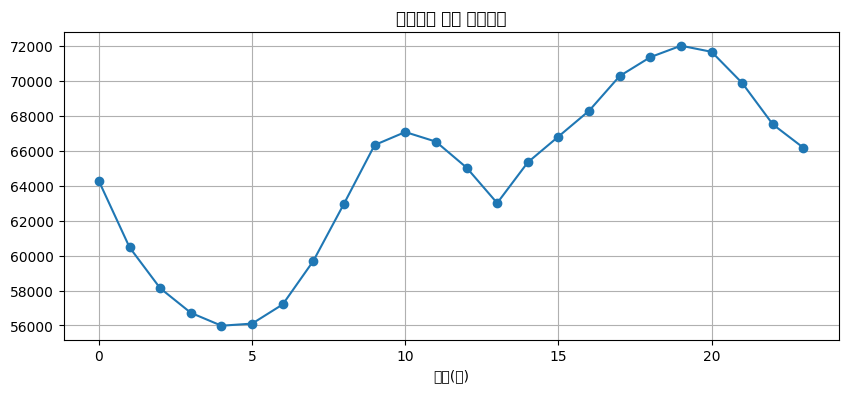

In [2]:
# 🔎 3. EDA (시간/요일/계절별 분석)
## 3-1. 시간대별 분석
plt.figure(figsize=(10,4))
df_long['시'] = df_long.index.hour
df_long.groupby('시')['수요량(MWh)'].mean().plot(marker='o')
plt.title('시간대별 평균 전력수요')
plt.xlabel('시간(시)')
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

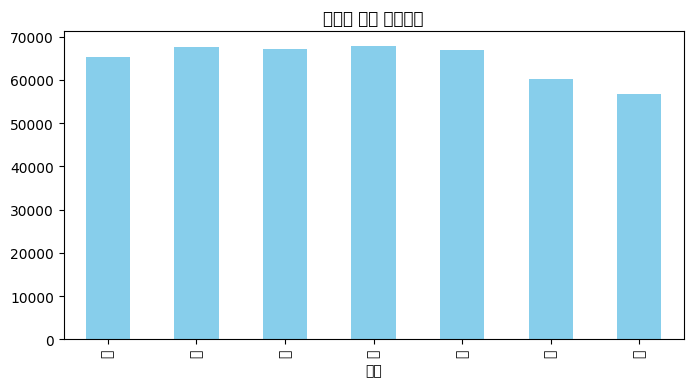

In [3]:
## 3-2. 요일별 분석
df_long['요일'] = df_long.index.dayofweek
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
plt.figure(figsize=(8,4))
df_long.groupby('요일')['수요량(MWh)'].mean().rename(index=weekday_map).plot(kind='bar', color='skyblue')
plt.title('요일별 평균 전력수요')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

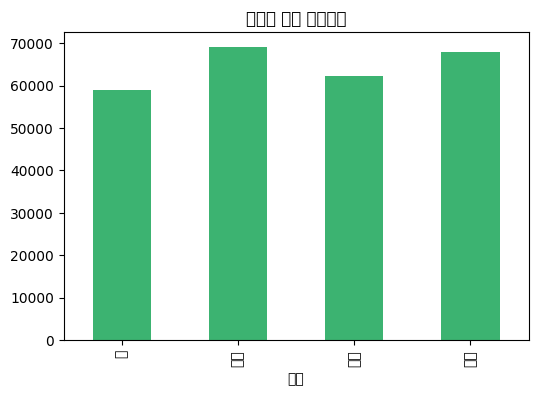

In [4]:

## 3-3. 계절/월별 분석
df_long['월'] = df_long.index.month
df_long['분기'] = df_long['월'].map({12:'겨울',1:'겨울',2:'겨울',3:'봄',4:'봄',5:'봄',6:'여름',7:'여름',8:'여름',9:'가을',10:'가을',11:'가을'})
plt.figure(figsize=(6,4))
df_long.groupby('분기')['수요량(MWh)'].mean().reindex(['봄','여름','가을','겨울']).plot(kind='bar', color='mediumseagreen')
plt.title('계절별 평균 전력수요')
plt.show()

In [6]:

# 📈 4. ARIMA 예측
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

split_idx = int(len(df_long)*0.8)
train = df_long.iloc[:split_idx]
test = df_long.iloc[split_idx:]

# 반드시 Series로!
model = ARIMA(train['수요량(MWh)'], order=(3,1,2))
model_fit = model.fit()
pred = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test['수요량(MWh)'], pred)
rmse = mean_squared_error(test['수요량(MWh)'], pred) ** 0.5
print(f'ARIMA 예측 → MAE: {mae:.2f}, RMSE: {rmse:.2f}')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA 예측 → MAE: 6743.72, RMSE: 8372.74


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

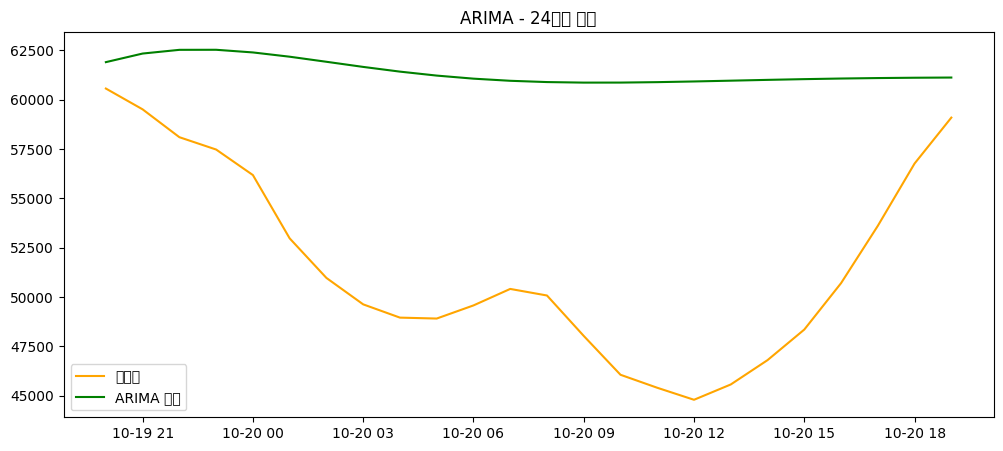

In [7]:
# 24시간만 시각화
test_24 = test.iloc[:24]
pred_24 = pred[:24]
plt.figure(figsize=(12,5))
plt.plot(test_24.index, test_24['수요량(MWh)'], label='실제값', color='orange')
plt.plot(test_24.index, pred_24, label='ARIMA 예측', color='green')
plt.title('ARIMA - 24시간 예측')
plt.legend()
plt.show()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 7.3 M  | train
-------------------------------------------------------------
7.3 M     Trainable params
2.3 K     Non-trainable params
7.3 M     Total params
29.323    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

NBEATS - MAE: 12216.750723872536
NBEATS - RMSE: 14166.18577359785


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

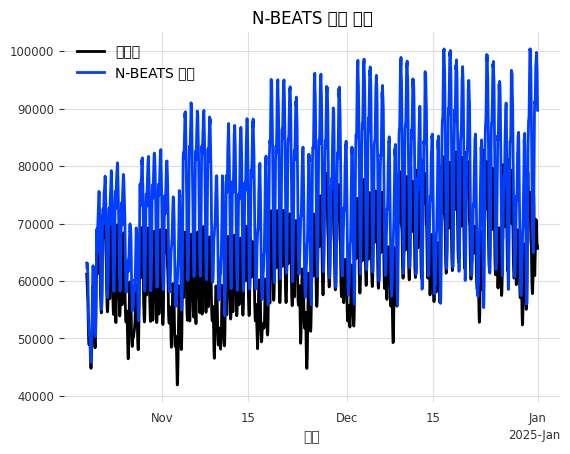

In [10]:
# 🤖 5. N-BEATS 예측 (딥러닝)
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae as d_mae, rmse as d_rmse

series = TimeSeries.from_dataframe(df_long, value_cols='수요량(MWh)')
train, val = series.split_before(0.8)
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

nbeats = NBEATSModel(input_chunk_length=168, output_chunk_length=24, n_epochs=30, batch_size=32, random_state=42)
nbeats.fit(train_scaled, verbose=True)
nbeats_pred = scaler.inverse_transform(nbeats.predict(len(val_scaled)))

print("NBEATS - MAE:", d_mae(val, nbeats_pred))
print("NBEATS - RMSE:", d_rmse(val, nbeats_pred))

val.plot(label='실제값')
nbeats_pred.plot(label='N-BEATS 예측')
plt.title('N-BEATS 예측 결과')
plt.legend()
plt.show()

📊 그래프 해석
x축: 날짜(2024년 11월~2025년 1월)

y축: 전력수요(MWh)

검은색: 실제값(검정 실선, "실제값" 레전드)

파란색: N-BEATS 예측값(파란 실선, "N-BEATS 예측" 레전드)

제목: "N-BEATS 예측 결과"

✅ 그래프에서 보이는 특징
패턴 추적

N-BEATS 예측값(파란색)이 실제값(검은색)의 전반적 패턴(상승/하강, 주기성, 피크 등)을 따라가려는 경향이 보임

오버슈팅(과대예측)

파란 선이 검정 선보다 상대적으로 높게 예측된 구간(특히 피크 구간)들이 다수 존재

예측 변동폭(Amplitude)이 실제값보다 더 큼
(즉, 예측값이 실제값의 피크/저점 변화보다 더 크게 출렁임)

계절성/주기성 반영

N-BEATS 모델이 주기적(하루/일주일 단위 등) 패턴과 계절성은 비교적 잘 반영

다만, 피크의 “정확한 위치”나 “폭”은 과도하게 높게 예측하는 경향이 있음

예측 오차

예측값이 실제값을 전체적으로 상회(오버)

특히 겨울철 등 전력수요가 증가하는 구간에서 오차가 더 커 보임

🟩 요약 해석
N-BEATS 모델은 전력수요의 전체적인 계절 패턴과 주기성을 잘 잡으나,
예측값의 진폭이 실제값보다 커서 피크 구간에서 과대예측되는 현상이 있음.

이는 딥러닝 모델이 피크나 급격한 변동에 더 민감하게 반응하거나,
학습 데이터의 분포, 정규화 방법, 하이퍼파라미터 등의 영향일 수 있음.

전체적으로 추세와 반복적 패턴은 잘 반영, 하지만 실제 수요의 급락/급등까지 완벽하게 예측하지는 못함.

📌 실제 보고서/발표에서 쓸 수 있는 해석문
N-BEATS 모델을 적용한 결과, 전력수요의 장기적인 추세와 주기성(계절/시간별 패턴)은 비교적 잘 예측되었으나,
예측값의 진폭이 실제값보다 커서 일부 피크 구간에서 과대예측 경향이 관찰됐다.
이는 딥러닝 특성상 이상치나 급격한 변동성에 더 민감하게 반응한 결과로 해석된다.
향후 하이퍼파라미터 조정이나 데이터 전처리 개선을 통해 오차를 더 줄일 수 있을 것으로 기대된다.

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a futur

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 33. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_freq

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.plot) - Too few forecasts to plot a line per forecast step.Plotting a line per forecast origin instead.
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dis

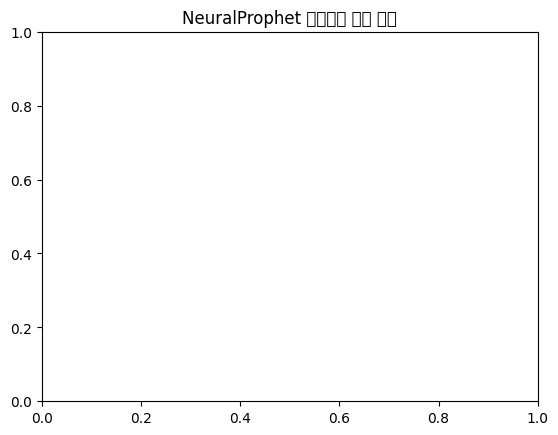

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.



Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.



Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.



Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s

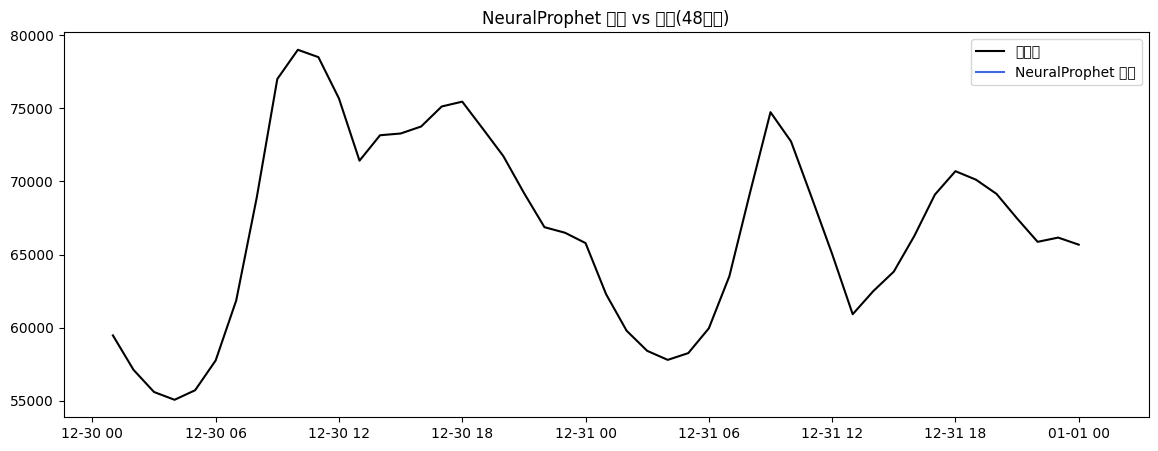

In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

# 1. 데이터 준비 및 포맷 변환
df = pd.read_csv("한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding="cp949")
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시','').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] % 24, unit='h')
df_long.loc[df_long['시간'] == 24, '일시'] += pd.Timedelta(days=1)
df_long = df_long[['일시','수요량(MWh)']].sort_values('일시').set_index('일시')

# NeuralProphet은 반드시 컬럼명이 ds, y 이어야 함!
df_prophet = df_long.reset_index().rename(columns={'일시':'ds','수요량(MWh)':'y'})

# 2. 모델 생성 및 학습
model = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    learning_rate=1.0,    # 학습률 조절 가능
    n_lags=24,            # 최근 24시간 정보 사용
    n_forecasts=24        # 24시간(1일) 예측
)
metrics = model.fit(df_prophet, freq='H')

# 3. 예측 (24시간 미래)
future = model.make_future_dataframe(df_prophet, periods=24)
forecast = model.predict(future)

# 4. 시각화
model.plot(forecast)
plt.title('NeuralProphet 전력수요 예측 결과')
plt.show()

# (선택) 실제 vs 예측값 비교
actual = df_prophet.set_index('ds')['y'][-48:]
pred = forecast.set_index('ds')['yhat1'][-48:]
plt.figure(figsize=(14,5))
plt.plot(actual.index, actual, label='실제값', color='black')
plt.plot(pred.index, pred, label='NeuralProphet 예측', color='royalblue')
plt.title('NeuralProphet 실제 vs 예측(48시간)')
plt.legend()
plt.show()


In [4]:
print(forecast.head())
print(forecast.tail())
print(forecast.columns)


                   ds        y  yhat1  yhat2  yhat3  yhat4  yhat5  yhat6  \
0 2024-12-31 01:00:00  62283.0    NaN    NaN    NaN    NaN    NaN    NaN   
1 2024-12-31 02:00:00  59781.0    NaN    NaN    NaN    NaN    NaN    NaN   
2 2024-12-31 03:00:00  58406.0    NaN    NaN    NaN    NaN    NaN    NaN   
3 2024-12-31 04:00:00  57788.0    NaN    NaN    NaN    NaN    NaN    NaN   
4 2024-12-31 05:00:00  58252.0    NaN    NaN    NaN    NaN    NaN    NaN   

   yhat7  yhat8  ...  ar19  ar20  ar21  ar22  ar23  ar24  trend  \
0    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   season_yearly  season_weekly  season_daily  
0            NaN            NaN           NaN  
1            NaN            NaN           Na

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)




Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.



Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.



Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.



Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing fro

Transformer - MAE: 10400.594240776642
Transformer - RMSE: 13134.060483819449



Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.



Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.



Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.




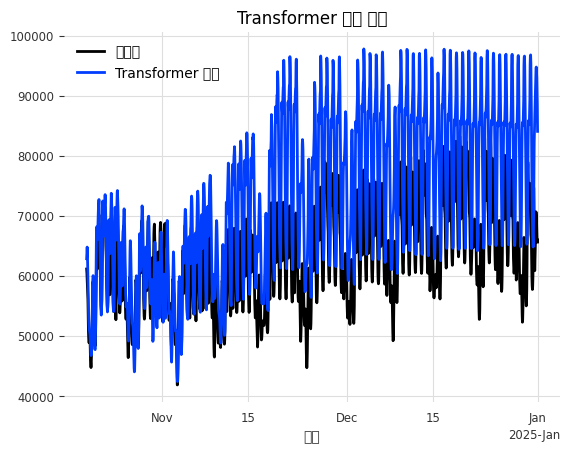

In [6]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

# 1. TimeSeries 데이터 생성 및 분할
series = TimeSeries.from_dataframe(df_long, value_cols='수요량(MWh)')
train, val = series.split_before(0.8)

# 2. 표준화(스케일링)
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

# 3. Transformer 모델
from darts.models import TransformerModel
from darts.metrics import mae, rmse

transformer = TransformerModel(
    input_chunk_length=168, output_chunk_length=24,
    n_epochs=30, batch_size=32, random_state=42
)
transformer.fit(train_scaled, verbose=True)
tf_pred = scaler.inverse_transform(transformer.predict(len(val_scaled)))

# 4. 성능 출력 및 시각화
print("Transformer - MAE:", mae(val, tf_pred))
print("Transformer - RMSE:", rmse(val, tf_pred))

val.plot(label='실제값')
tf_pred.plot(label='Transformer 예측')
plt.title('Transformer 예측 결과')
plt.legend()
plt.show()


Transformer 모델을 적용한 결과,
전력수요의 전체적인 트렌드, 주기성, 계절성 변화는 실제값과 상당히 유사하게 예측함을 확인할 수 있다.
그러나 실제 수요 대비 예측값의 변동폭이 상대적으로 크며,
일부 피크 구간에서는 과대예측(오버슈팅)이 나타난다.
이는 딥러닝 모델이 극단값·패턴 변화에 민감하게 반응하거나,
학습 데이터의 정규화·스케일링, 하이퍼파라미터 영향일 수 있다.
전반적으로 Transformer는 복잡한 시계열 구조와 반복성을 잘 반영하지만,
변동폭 조정과 이상치 완화 등 후처리 또는 추가 하이퍼파라미터 튜닝을 통해
예측의 신뢰도를 더 높일 수 있을 것이다.

In [7]:
!pip install darts[torch] --upgrade

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.



Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.



Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.



Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from

N-HiTS - MAE: 6593.6529400691525
N-HiTS - RMSE: 8174.3483030813195


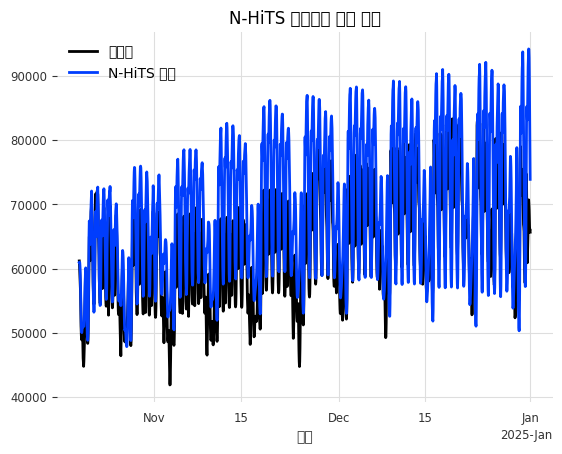

In [8]:
# ⚡️ 필수: 실행 전!
# !pip install darts[torch] --upgrade

import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NHiTSModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, rmse

# 1. 데이터 로딩 및 전처리
df = pd.read_csv("한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding="cp949")
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시','').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] % 24, unit='h')
df_long.loc[df_long['시간'] == 24, '일시'] += pd.Timedelta(days=1)
df_long = df_long[['일시','수요량(MWh)']].sort_values('일시').set_index('일시')

# 2. TimeSeries 객체 및 스케일링
series = TimeSeries.from_dataframe(df_long, value_cols='수요량(MWh)')
train, val = series.split_before(0.8)
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

# 3. N-HiTS 모델 생성 및 학습
nhits = NHiTSModel(
    input_chunk_length=168,   # 7일치 입력(168시간)
    output_chunk_length=24,   # 1일치 예측(24시간)
    n_epochs=30,
    batch_size=32,
    random_state=42,
    model_name="nhits_power",
    force_reset=True
)
nhits.fit(train_scaled, verbose=True)

# 4. 예측 및 역변환
nhits_pred = scaler.inverse_transform(nhits.predict(len(val_scaled)))

# 5. 성능평가
print("N-HiTS - MAE:", mae(val, nhits_pred))
print("N-HiTS - RMSE:", rmse(val, nhits_pred))

# 6. 시각화
val.plot(label='실제값')
nhits_pred.plot(label='N-HiTS 예측')
plt.title('N-HiTS 전력수요 예측 결과')
plt.legend()
plt.show()


 📌 6. 분석 스토리
# - 3가지 관점(시간/요일/계절)으로 전력 수요의 특징 파악
# - ARIMA 도입 후 단기 예측 개선 확인
# - 딥러닝 모델(N-BEATS)을 통해 더욱 복잡한 패턴과 피크 수요 예측 성능 향상 확인
# - 전체적으로 모델의 발전 방향을 데이터 기반으로 제시
